In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
flight = pd.read_csv(r"C:\Users\deepa\Panda 2024\Flight Prediction\notebook\flight data.csv")
flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


Checking the data types

In [3]:
flight.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

All the columns are object except price

In [4]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
flight.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
flight = flight.dropna()

In [7]:
flight

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [8]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [9]:
flight.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

Spliting the Journey date column into day, month, Year

In [10]:
flight['Date_of_Journey'] = pd.to_datetime(flight['Date_of_Journey'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18/04/2019' in DD/MM/YYYY format. Provide format or specif

In [11]:
flight["Day"] = flight['Date_of_Journey'].dt.day

In [12]:
flight['Month'] = flight['Date_of_Journey'].dt.month

In [13]:
flight['Year'] = flight['Date_of_Journey'].dt.year

In [14]:
flight = flight.drop(['Date_of_Journey'],axis=1)

In [15]:
flight

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,4,9,2019
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,3,1,2019


In [16]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10682 non-null  object
 5   Arrival_Time     10682 non-null  object
 6   Duration         10682 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10682 non-null  object
 9   Price            10682 non-null  int64 
 10  Day              10682 non-null  int64 
 11  Month            10682 non-null  int64 
 12  Year             10682 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 1.1+ MB


In [17]:
flight.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [18]:
flight.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [19]:
flight.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [20]:
flight.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [24]:
flight['Dep_Time'] = pd.to_datetime(flight['Dep_Time'])

In [25]:
flight.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,2024-09-27 22:20:00,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-09-27 05:50:00,13:15,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2024-09-27 09:25:00,04:25 10 Jun,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2024-09-27 18:05:00,23:30,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2024-09-27 16:50:00,21:35,4h 45m,1 stop,No info,13302,3,1,2019


In [26]:
flight['Dep_hour'] = flight['Dep_Time'].dt.hour

In [27]:
flight['Dep_min'] = flight['Dep_Time'].dt.minute

In [34]:
flight.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2024-09-27 22:20:00,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-09-27 05:50:00,13:15,7h 25m,2 stops,No info,7662,5,1,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2024-09-27 09:25:00,04:25 10 Jun,19h,2 stops,No info,13882,6,9,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2024-09-27 18:05:00,23:30,5h 25m,1 stop,No info,6218,5,12,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2024-09-27 16:50:00,21:35,4h 45m,1 stop,No info,13302,3,1,2019,16,50


In [35]:
flight = flight.drop(['Dep_Time'],axis=1)

In [36]:
flight.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,1,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,6,9,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,5,12,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,3,1,2019,16,50


In [37]:
flight['Arrival_Time'] = pd.to_datetime(flight['Arrival_Time'])

In [39]:
flight['Arrival_hour'] = flight['Arrival_Time'].dt.hour

In [43]:
flight['Arrival_min'] = flight['Arrival_Time'].dt.minute

In [45]:
flight = flight.drop('Arrival_Time',axis=1)

In [47]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10682 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10682 non-null  object
 7   Price            10682 non-null  int64 
 8   Day              10682 non-null  int64 
 9   Month            10682 non-null  int64 
 10  Year             10682 non-null  int64 
 11  Dep_hour         10682 non-null  int64 
 12  Dep_min          10682 non-null  int64 
 13  Arrival_hour     10682 non-null  int64 
 14  Arrival_min      10682 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 1.3+ MB


In [48]:
flight.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35


In [49]:
flight.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [50]:
temp = flight

In [51]:
temp

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,4,9,2019,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,2019,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,2019,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,3,1,2019,11,30,14,10


In [52]:
temp['Duration']

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [93]:
int((temp['Duration'][1].split()[1]).replace("m",""))

25

In [ ]:
for i in len(10682):
    if 

In [97]:
duration_list = list(temp['Duration'])
for i in range(len(duration_list)):
    if len(duration_list[i].split()) != 2:
        if "h" in duration_list[i]:
            duration_list[i] = duration_list[i] + " 0m"
        else:
            duration_list[i] = "0h " + duration_list[i]
#             print(i)
#         print(duration_list[i])
#         print(i)
        
duration_hours = []        
duration_minutes = []
for i in range(len(duration_list)):
    duration_hours.append(int(duration_list[i].split("h")[0]))
    duration_minutes.append(int((duration_list[i].split()[1]).replace("m","")))
# print(duration_hours)
# print(duration_minutes)

In [98]:
flight['duration_hours'] = duration_hours

In [100]:
flight['duration_minutes'] = duration_minutes

In [102]:
flight = flight.drop(['Duration'],axis=1)

In [103]:
flight.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hours,duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45


In [104]:
flight.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [105]:
flight.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [133]:
flight.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [136]:
flight['Duration']=flight['duration_hours']*60+flight['duration_minutes']

In [150]:
flight.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hours,duration_minutes,Duration
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45,285


In [155]:
flight[['Price','Day','Month','Dep_hour','Arrival_hour','Duration']].corr()

,Price,Day,Month,Dep_hour,Arrival_hour,Duration
Price,1.000000,-0.165448,0.010705,0.006799,0.024244,0.506480
Day,-0.165448,1.000000,-0.264896,-0.002301,-0.002176,-0.038360
Month,0.010705,-0.264896,1.000000,0.028189,-0.004329,0.055136
Dep_hour,0.006799,-0.002301,0.028189,1.000000,0.005180,0.002088
Arrival_hour,0.024244,-0.002176,-0.004329,0.005180,1.000000,0.051531
Duration,0.506480,-0.038360,0.055136,0.002088,0.051531,1.000000


Price and duration are positive correlate(if one will increases than other also)

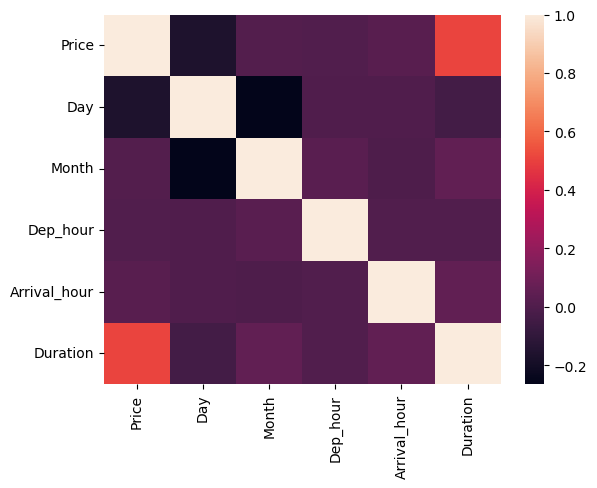

In [159]:
sns.heatmap(data=flight[['Price','Day','Month','Dep_hour','Arrival_hour','Duration']].corr())
plt.show()

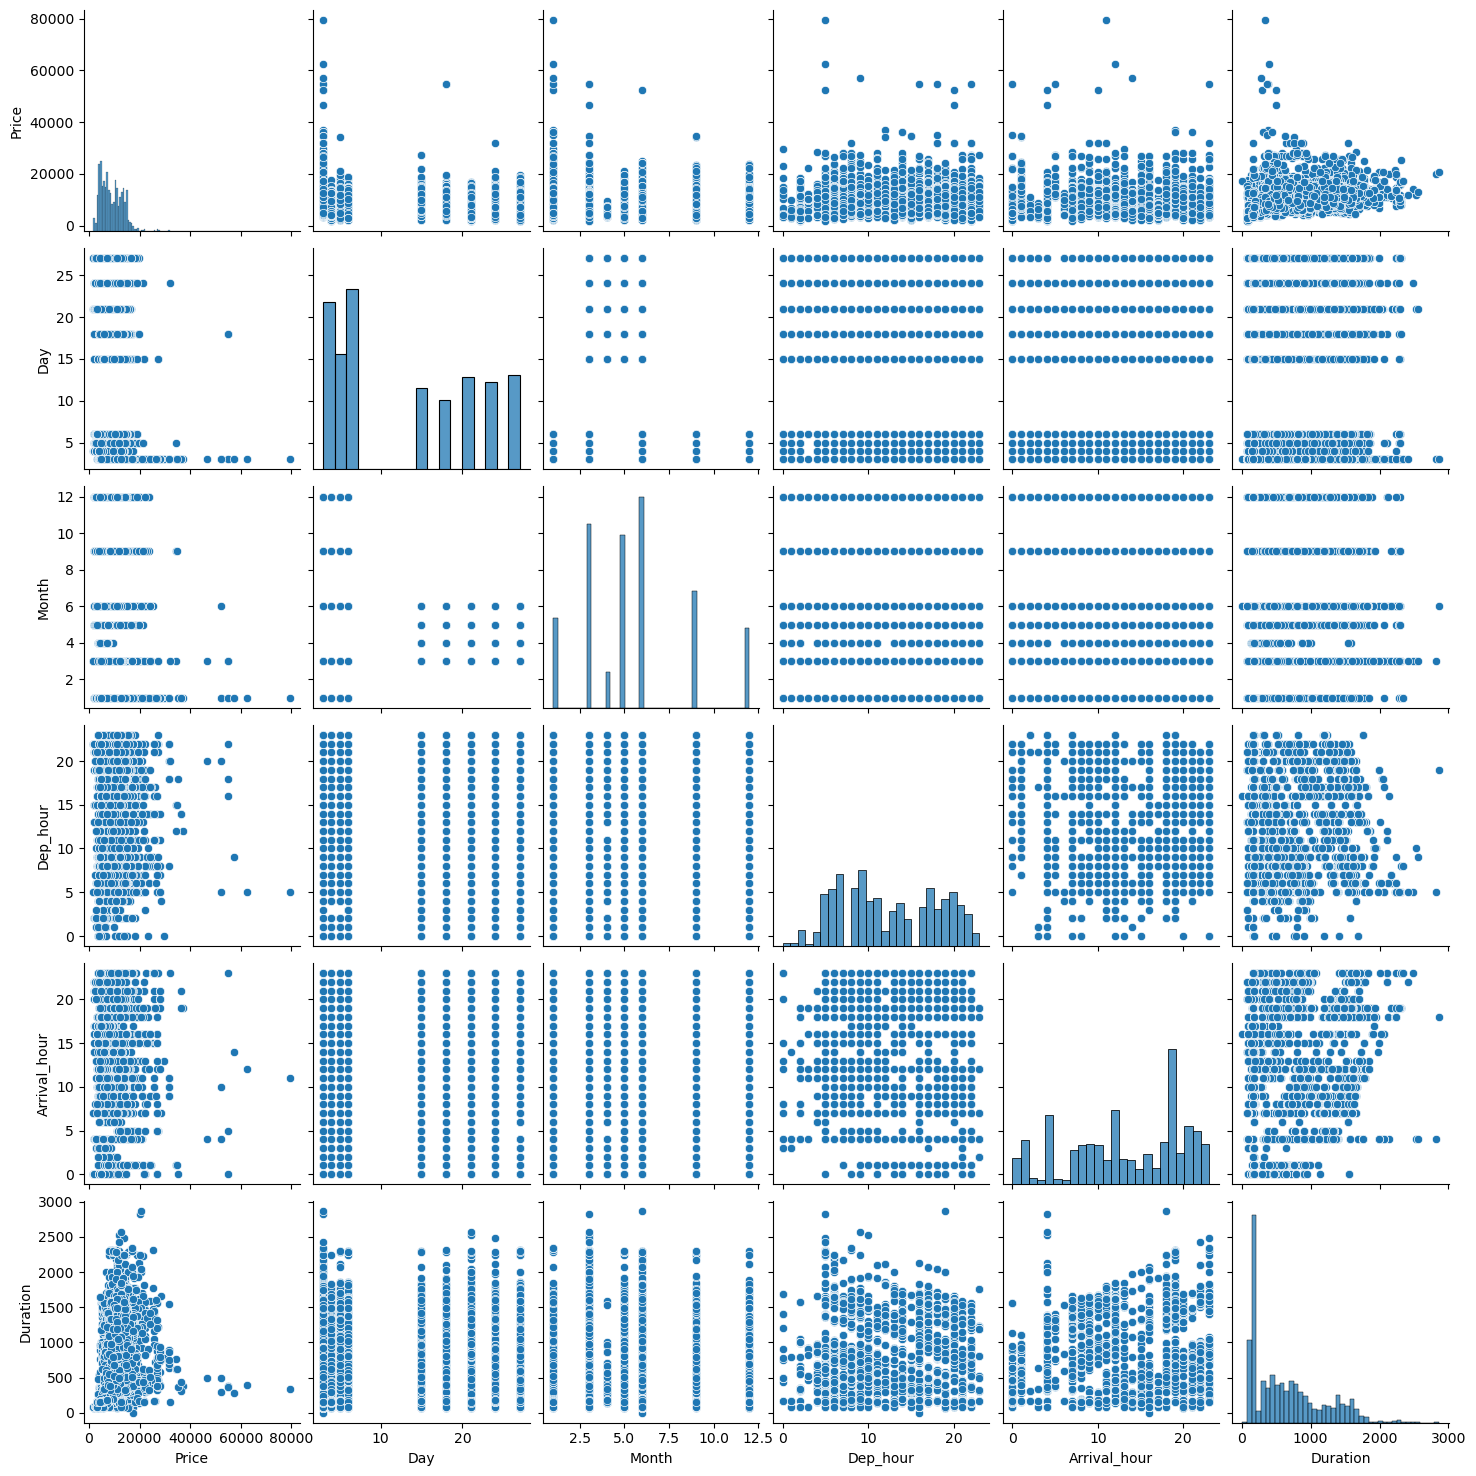

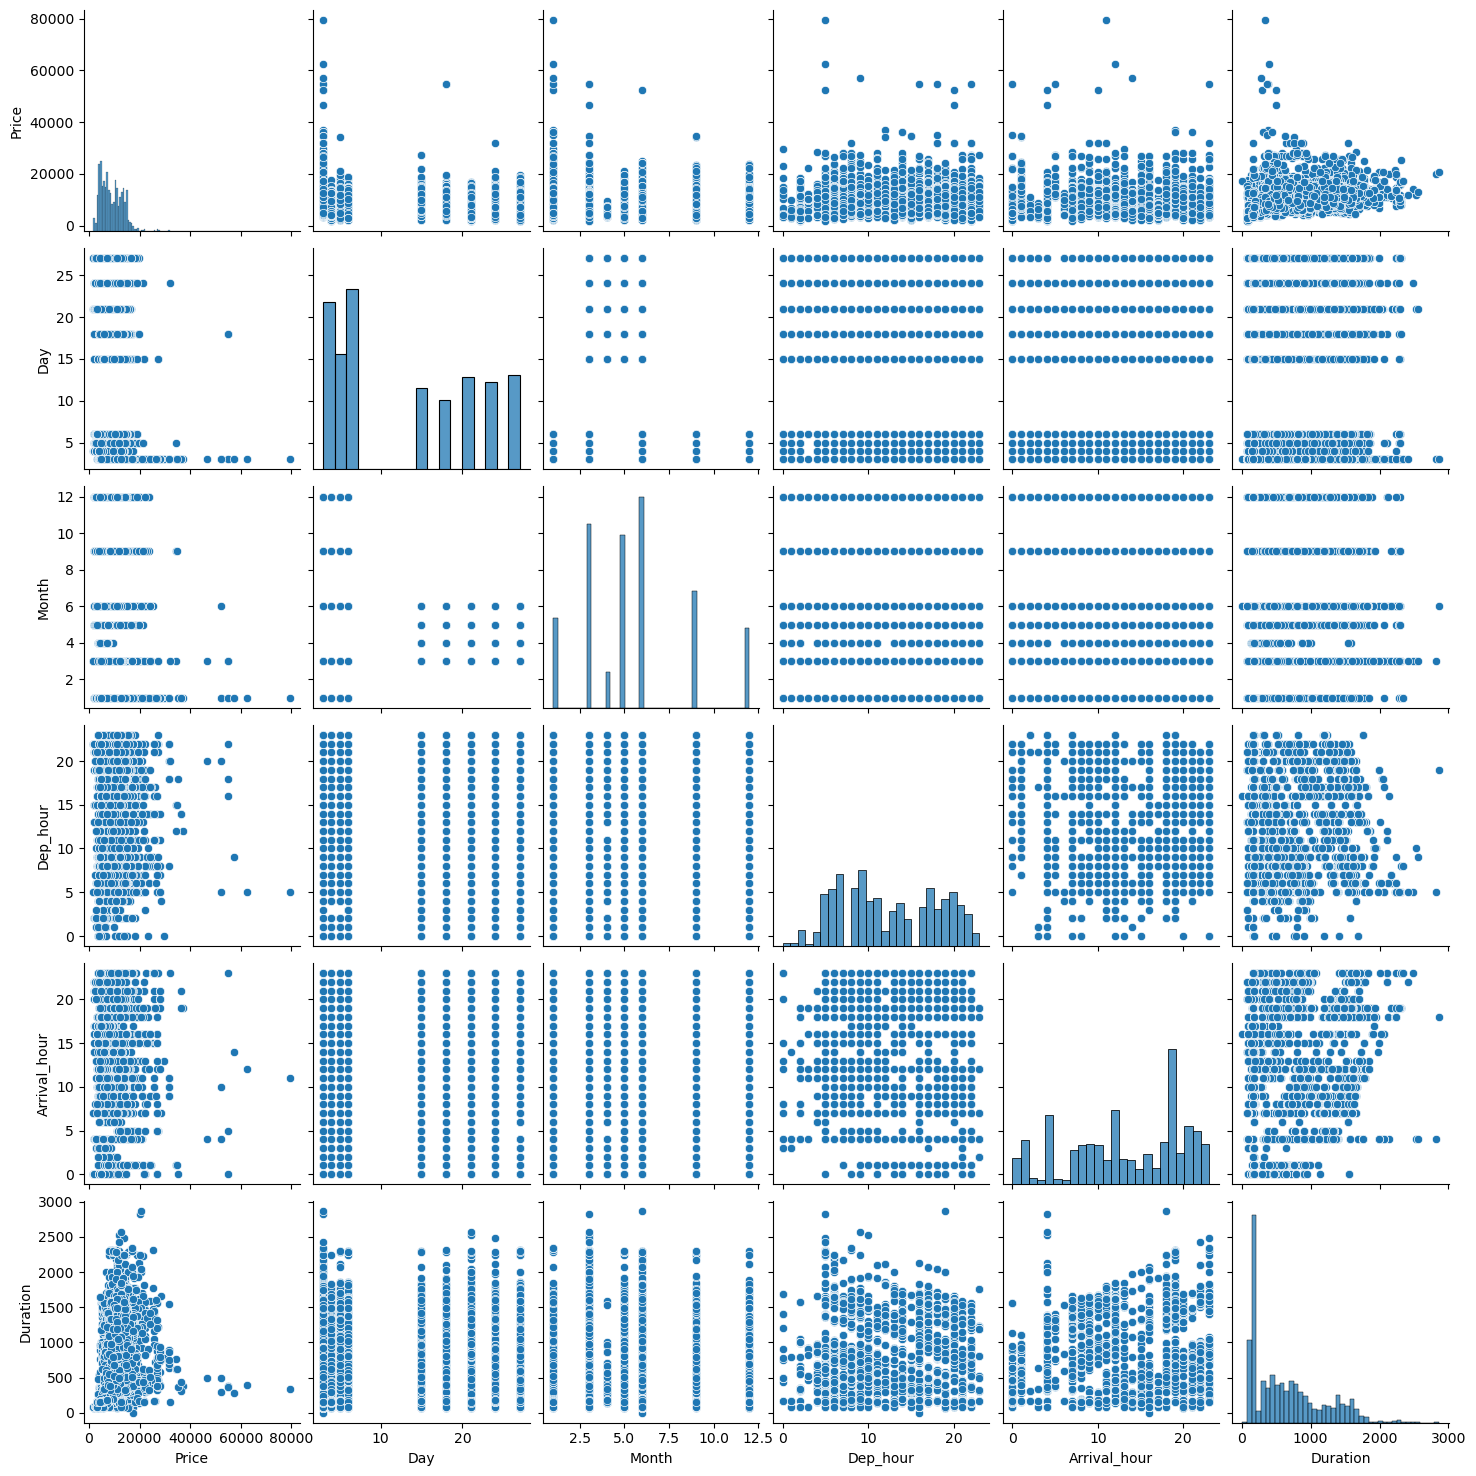

In [161]:
sns.pairplot(data=flight[['Price','Day','Month','Dep_hour','Arrival_hour','Duration']])
plt.show()

Airline vs Price

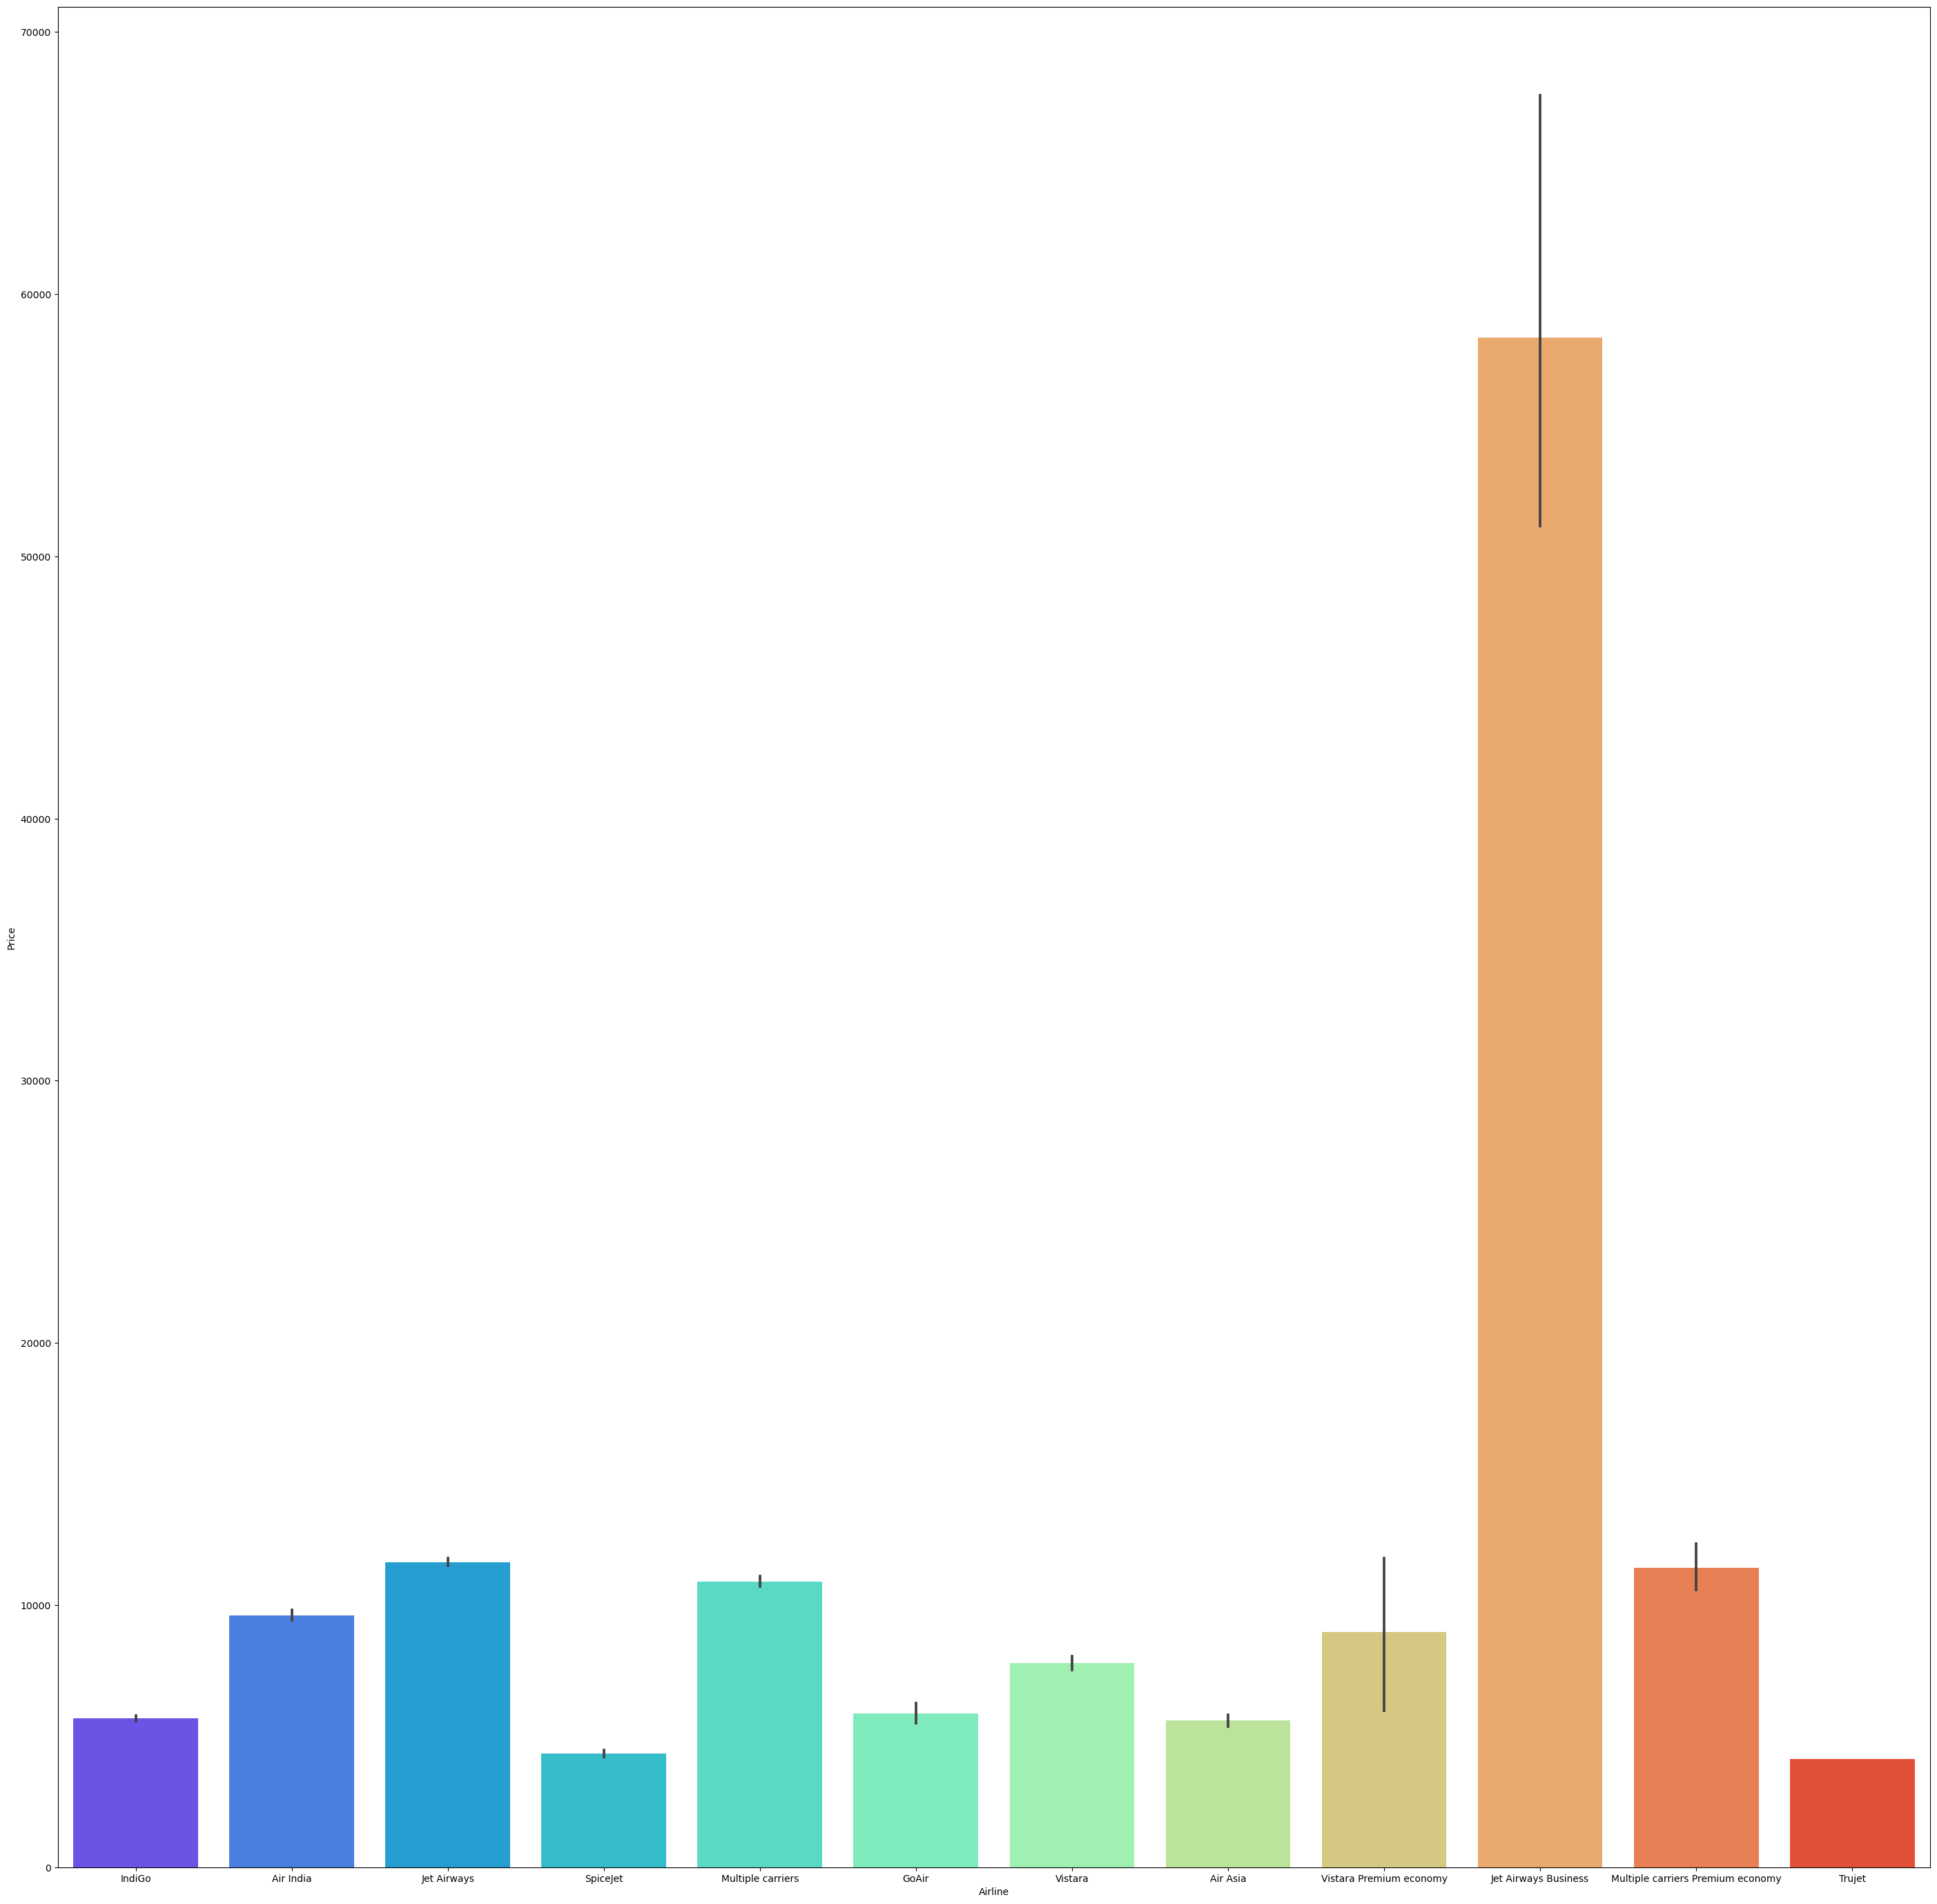

In [144]:
plt.figure(figsize=(35,35))
sns.barplot(x='Airline',y='Price',data=flight,palette='rainbow')
plt.show()

Jet Airways Bussiness has highest ticket value price

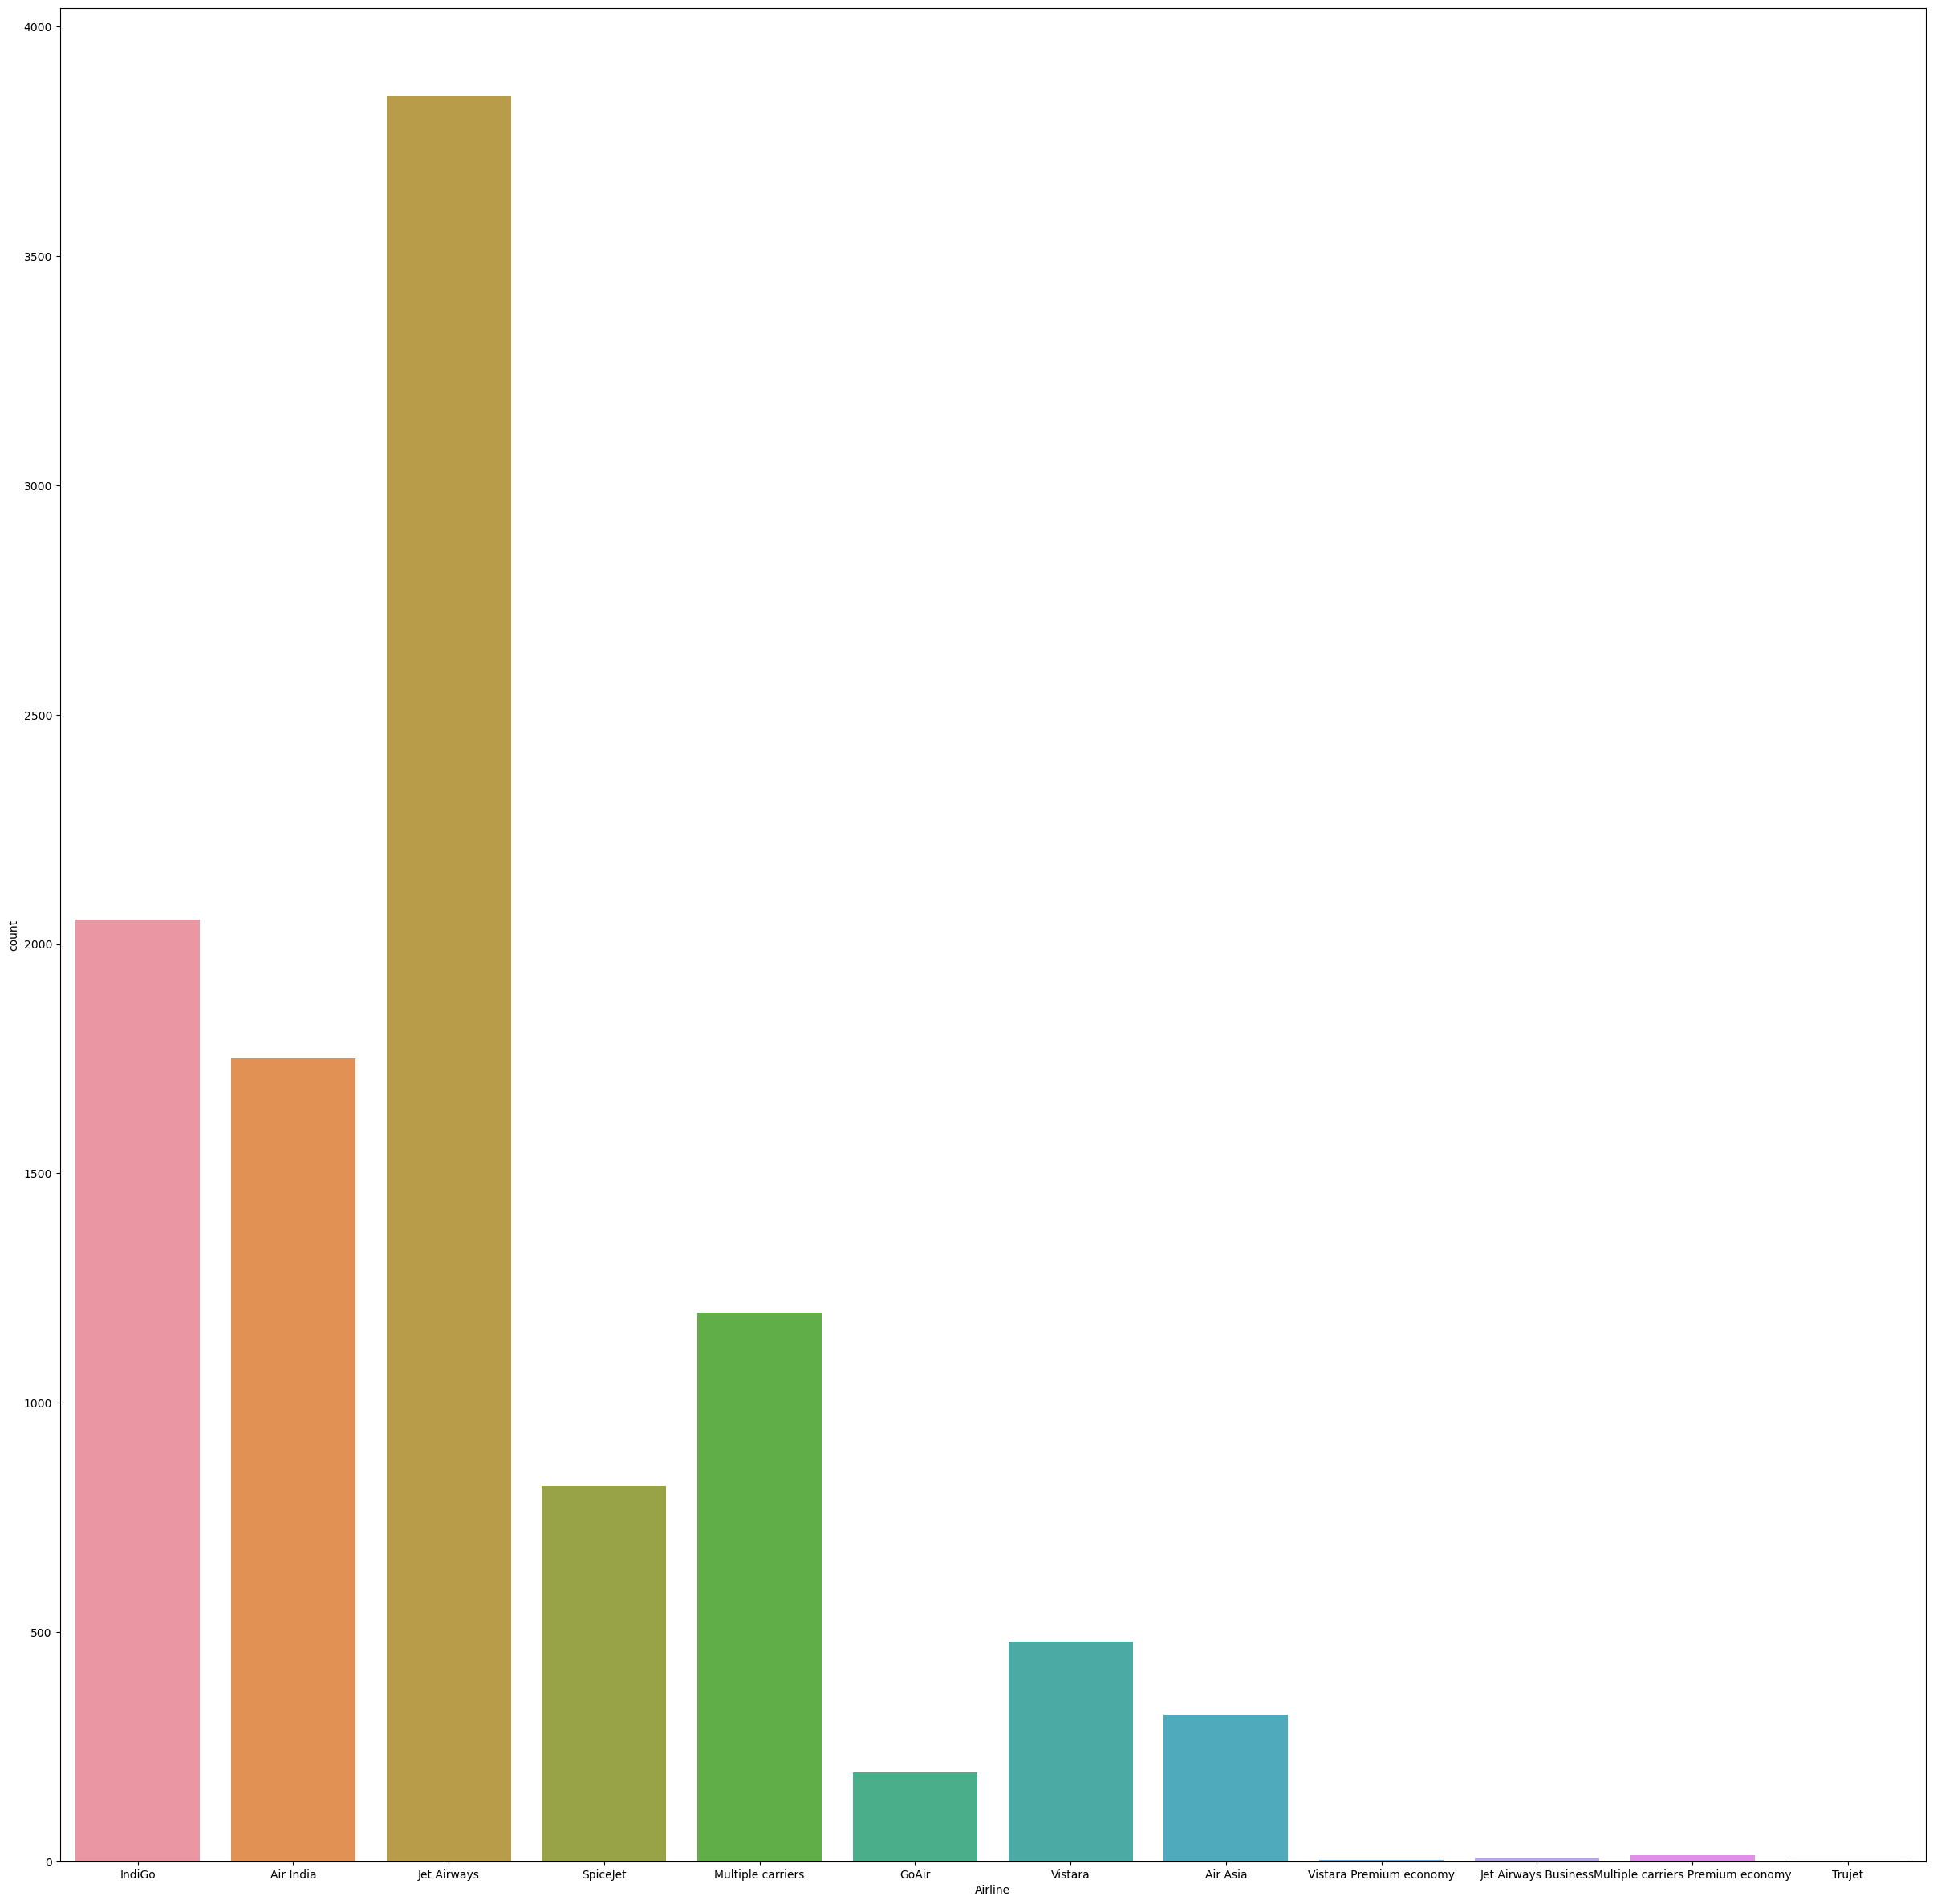

In [147]:
plt.figure(figsize=(30,30))
sns.countplot(x='Airline',data=flight)
plt.show()

Maximum booking is done by jet Airways follwed by indigo

In [149]:
flight.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hours,duration_minutes,Duration
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445


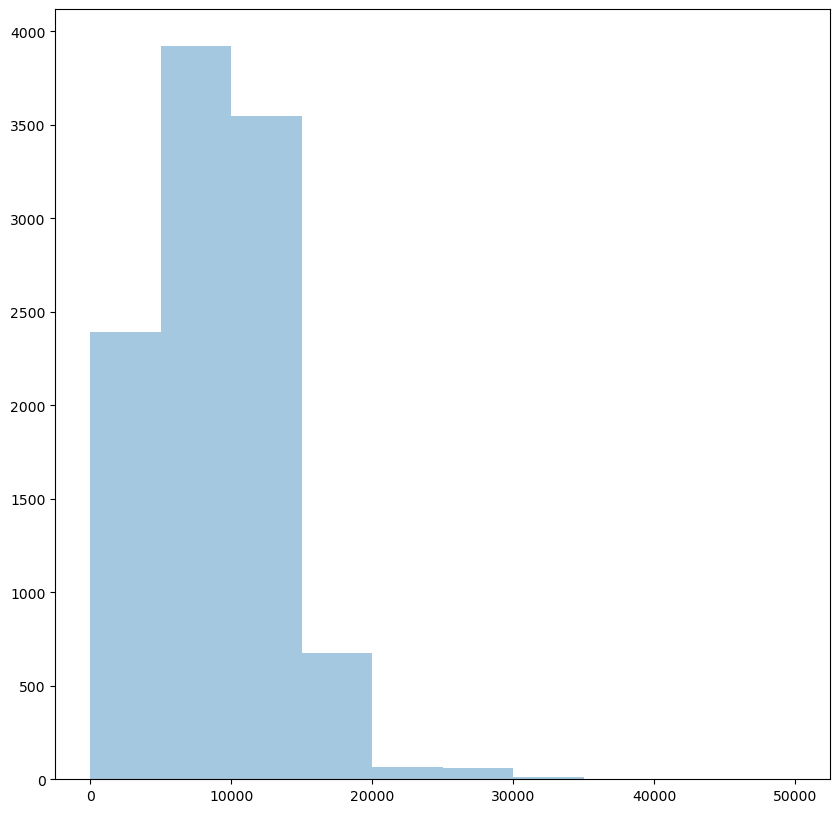

In [173]:
plt.figure(figsize=(10,10))
sns.distplot(x=flight['Price'],bins=[0,5000,10000,15000,20000,25000,30000,35000,40000,45000,50000],kde=False)
plt.show()

Maximum flight booking price contain between 0 to 15000

<Figure size 2000x2000 with 0 Axes>

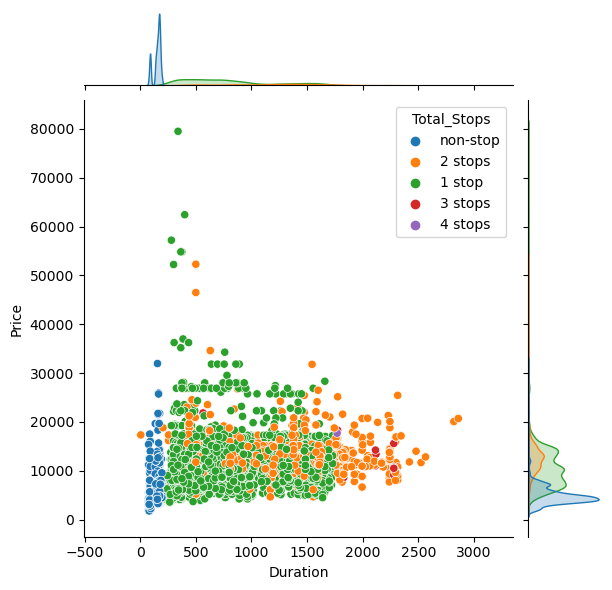

In [185]:
plt.figure(figsize=(20,20))
sns.jointplot(x='Duration',y='Price',data=flight,hue='Total_Stops')
plt.show()

Top 10 Aviation Company whose tickets sold the most

In [189]:
flight.Airline.value_counts()[:10]

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Name: Airline, dtype: int64

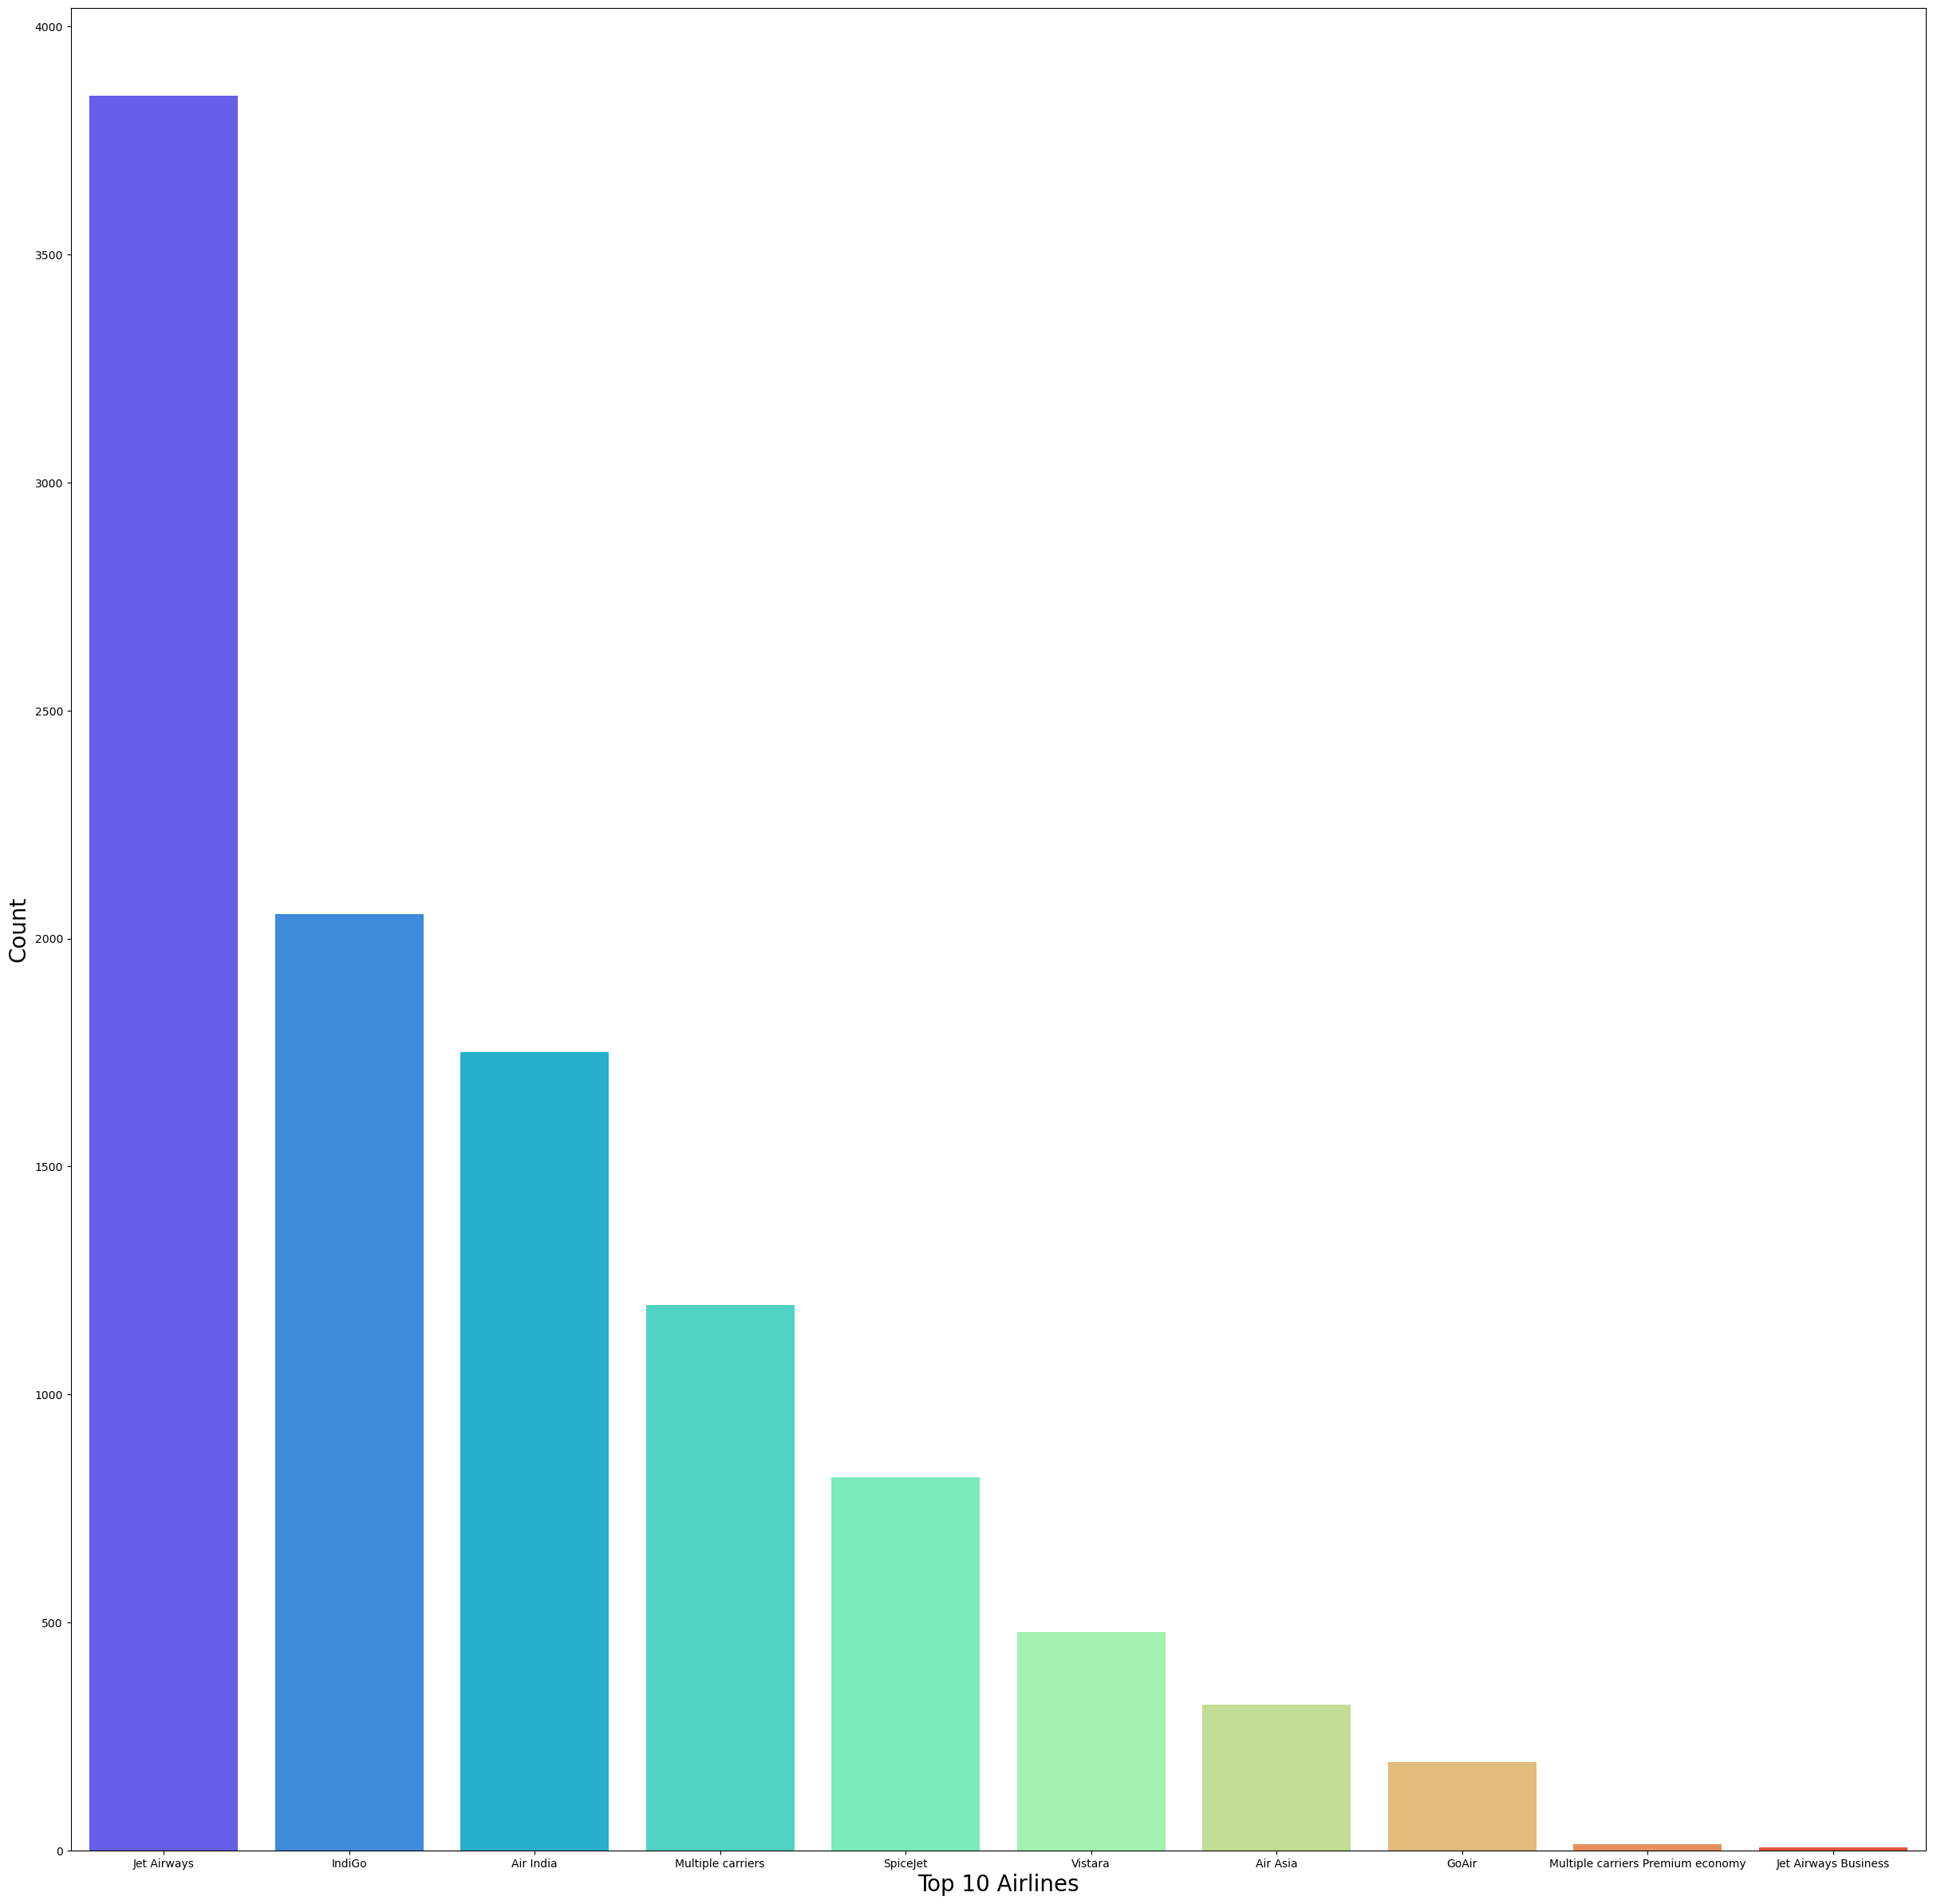

In [202]:
plt.figure(figsize=(30,30))
sns.countplot(x='Airline',data=flight,order=flight['Airline'].value_counts()[:10].index,palette='rainbow')
plt.xlabel('Top 10 Airlines',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()

Jet Airways is used by maximum persons

# Destination vs Price

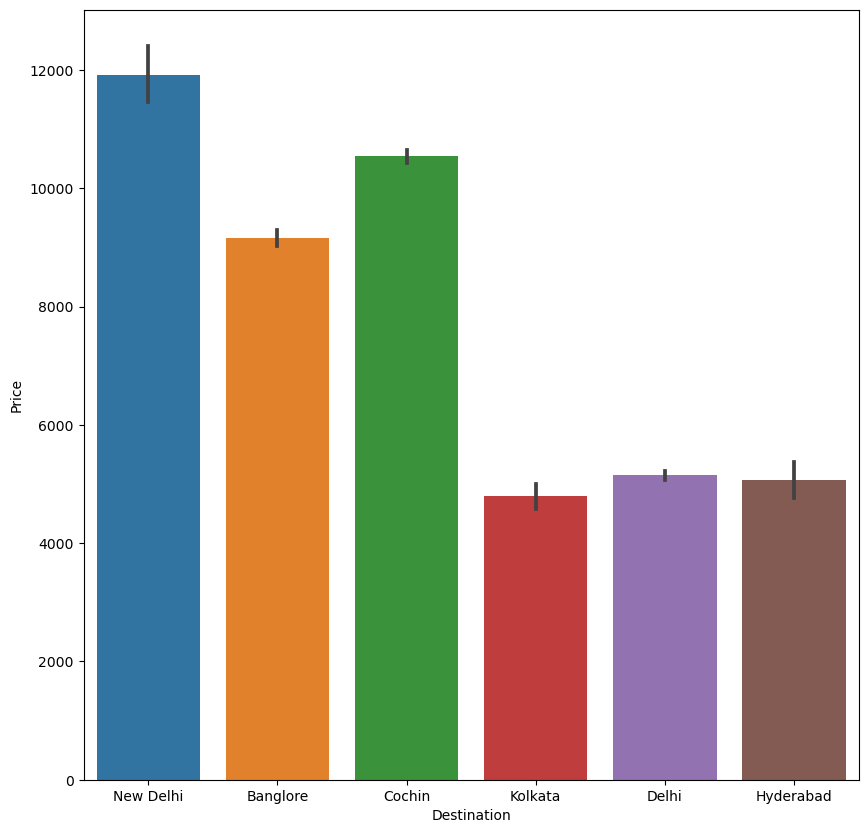

In [203]:
plt.figure(figsize=(10,10))
sns.barplot(x='Destination',y='Price',data=flight)
plt.show()

Delhi Destination city has a highest price

# Source vs Price

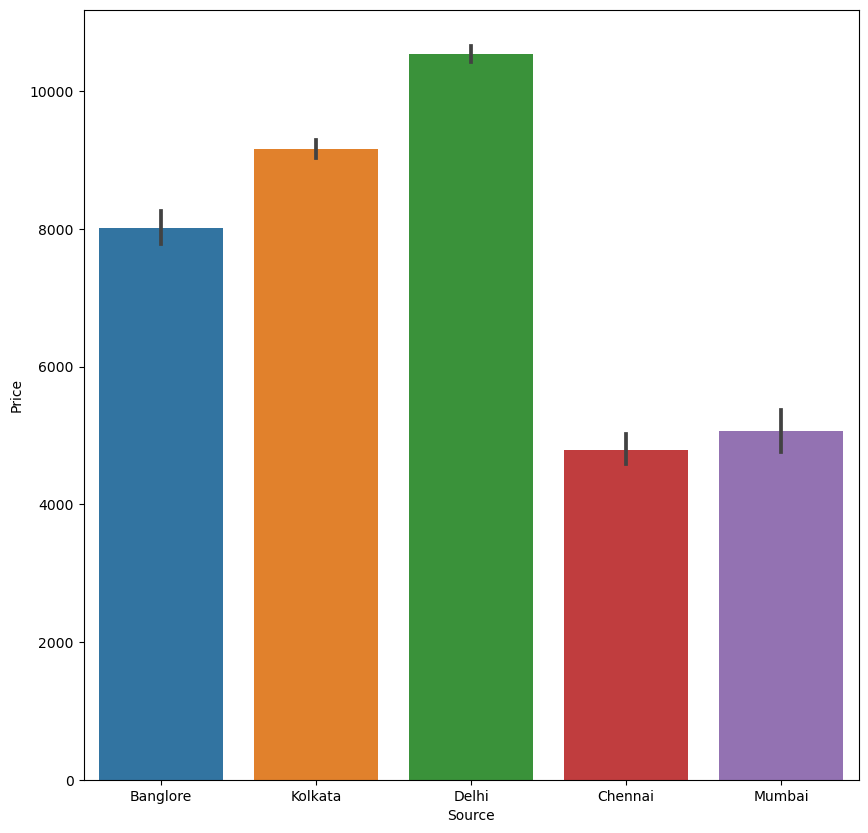

In [204]:
plt.figure(figsize=(10,10))
sns.barplot(x='Source',y='Price',data=flight)
plt.show()

Delhi as a source city also has maximum price

# Handing Categorical Data

In [207]:
flight.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Day', 'Month', 'Year', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'duration_hours',
       'duration_minutes', 'Duration'],
      dtype='object')

'Airline', 'Source', 'Destination' are Nominal variable we use One Hot Encoder for this 

In [208]:
flight.Airline

0             IndiGo
1          Air India
2        Jet Airways
3             IndiGo
4             IndiGo
            ...     
10678       Air Asia
10679      Air India
10680    Jet Airways
10681        Vistara
10682      Air India
Name: Airline, Length: 10682, dtype: object

In [213]:
Airline = pd.get_dummies(data=flight[['Airline']],drop_first=True)
Airline

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


In [214]:
Source = pd.get_dummies(data=flight[['Source']])
Source

,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0
...,...,...,...,...,...
10678,0,0,0,1,0
10679,0,0,0,1,0
10680,1,0,0,0,0
10681,1,0,0,0,0


In [215]:
Destination = pd.get_dummies(data=flight[['Destination']])
Destination

,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
10678,1,0,0,0,0,0
10679,1,0,0,0,0,0
10680,0,0,1,0,0,0
10681,0,0,0,0,0,1


In [218]:
flight = pd.concat([flight,Airline,Source,Destination],axis=1)
flight

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day,Month,Year,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,2019,...,0,0,1,0,1,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,2019,...,0,1,0,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,2019,...,0,0,1,0,1,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,2019,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,4,9,2019,...,0,0,1,0,1,0,0,0,0,0
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,2019,...,0,0,1,0,1,0,0,0,0,0
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,2019,...,0,0,0,0,0,0,1,0,0,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,3,1,2019,...,0,0,0,0,0,0,0,0,0,1


In [219]:
flight = flight.drop('Airline',axis=1)
flight

,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,...,0,0,0,0,0,0,0,0,0,1
1,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,2019,5,...,0,0,1,0,1,0,0,0,0,0
2,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,2019,9,...,0,1,0,0,0,1,0,0,0,0
3,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,2019,18,...,0,0,1,0,1,0,0,0,0,0
4,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,2019,16,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,4,9,2019,19,...,0,0,1,0,1,0,0,0,0,0
10679,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,2019,20,...,0,0,1,0,1,0,0,0,0,0
10680,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,2019,8,...,0,0,0,0,0,0,1,0,0,0
10681,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,3,1,2019,11,...,0,0,0,0,0,0,0,0,0,1


In [220]:
flight= flight.drop(['Source','Destination'],axis=1)
flight

,Route,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_min,Arrival_hour,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,2019,5,50,13,...,0,0,1,0,1,0,0,0,0,0
2,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,2019,9,25,4,...,0,1,0,0,0,1,0,0,0,0
3,CCU → NAG → BLR,1 stop,No info,6218,5,12,2019,18,5,23,...,0,0,1,0,1,0,0,0,0,0
4,BLR → NAG → DEL,1 stop,No info,13302,3,1,2019,16,50,21,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,CCU → BLR,non-stop,No info,4107,4,9,2019,19,55,22,...,0,0,1,0,1,0,0,0,0,0
10679,CCU → BLR,non-stop,No info,4145,27,4,2019,20,45,23,...,0,0,1,0,1,0,0,0,0,0
10680,BLR → DEL,non-stop,No info,7229,27,4,2019,8,20,11,...,0,0,0,0,0,0,1,0,0,0
10681,BLR → DEL,non-stop,No info,12648,3,1,2019,11,30,14,...,0,0,0,0,0,0,0,0,0,1


In [221]:
flight = flight.drop('Additional_Info',axis=1)
flight.head()

,Route,Total_Stops,Price,Day,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR → DEL,non-stop,3897,24,3,2019,22,20,1,10,...,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,2 stops,7662,5,1,2019,5,50,13,15,...,0,0,1,0,1,0,0,0,0,0
2,DEL → LKO → BOM → COK,2 stops,13882,6,9,2019,9,25,4,25,...,0,1,0,0,0,1,0,0,0,0
3,CCU → NAG → BLR,1 stop,6218,5,12,2019,18,5,23,30,...,0,0,1,0,1,0,0,0,0,0
4,BLR → NAG → DEL,1 stop,13302,3,1,2019,16,50,21,35,...,0,0,0,0,0,0,0,0,0,1


In [222]:
flight.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

For Total_Stops order is important so we apply lable encoder

In [224]:
flight = flight.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})
flight

,Route,Total_Stops,Price,Day,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR → DEL,0,3897,24,3,2019,22,20,1,10,...,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,2,7662,5,1,2019,5,50,13,15,...,0,0,1,0,1,0,0,0,0,0
2,DEL → LKO → BOM → COK,2,13882,6,9,2019,9,25,4,25,...,0,1,0,0,0,1,0,0,0,0
3,CCU → NAG → BLR,1,6218,5,12,2019,18,5,23,30,...,0,0,1,0,1,0,0,0,0,0
4,BLR → NAG → DEL,1,13302,3,1,2019,16,50,21,35,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,CCU → BLR,0,4107,4,9,2019,19,55,22,25,...,0,0,1,0,1,0,0,0,0,0
10679,CCU → BLR,0,4145,27,4,2019,20,45,23,20,...,0,0,1,0,1,0,0,0,0,0
10680,BLR → DEL,0,7229,27,4,2019,8,20,11,20,...,0,0,0,0,0,0,1,0,0,0
10681,BLR → DEL,0,12648,3,1,2019,11,30,14,10,...,0,0,0,0,0,0,0,0,0,1


In [225]:
flight = flight.drop('Route',axis=1)
flight.head()

,Total_Stops,Price,Day,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hours,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,2019,22,20,1,10,2,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,5,1,2019,5,50,13,15,7,...,0,0,1,0,1,0,0,0,0,0
2,2,13882,6,9,2019,9,25,4,25,19,...,0,1,0,0,0,1,0,0,0,0
3,1,6218,5,12,2019,18,5,23,30,5,...,0,0,1,0,1,0,0,0,0,0
4,1,13302,3,1,2019,16,50,21,35,4,...,0,0,0,0,0,0,0,0,0,1


In [226]:
pd.options.display.max_columns=50

In [228]:
flight

,Total_Stops,Price,Day,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hours,duration_minutes,Duration,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,2019,22,20,1,10,2,50,170,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,2,7662,5,1,2019,5,50,13,15,7,25,445,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,2,13882,6,9,2019,9,25,4,25,19,0,1140,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,1,6218,5,12,2019,18,5,23,30,5,25,325,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,1,13302,3,1,2019,16,50,21,35,4,45,285,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,4,9,2019,19,55,22,25,2,30,150,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
10679,0,4145,27,4,2019,20,45,23,20,2,35,155,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
10680,0,7229,27,4,2019,8,20,11,20,3,0,180,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
10681,0,12648,3,1,2019,11,30,14,10,2,40,160,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1


# Test Data Calculation

In [230]:
flight_test = pd.read_excel(r"C:\Users\deepa\Panda 2024\Flight Prediction\notebook\Test_set.xlsx")
flight_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [231]:
pd.to_datetime(flight_test['Date_of_Journey'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '21/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18/05/2019' in DD/MM/YYYY format. Provide format or specif

0      2019-06-06
1      2019-12-05
2      2019-05-21
3      2019-05-21
4      2019-06-24
          ...    
2666   2019-06-06
2667   2019-03-27
2668   2019-06-03
2669   2019-06-03
2670   2019-06-15
Name: Date_of_Journey, Length: 2671, dtype: datetime64[ns]

In [232]:
flight_test['Date_of_Journey'] = pd.to_datetime(flight_test['Date_of_Journey'])
flight_test.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '21/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18/05/2019' in DD/MM/YYYY format. Provide format or specif

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [233]:
flight_test['Day'] = flight_test['Date_of_Journey'].dt.day
flight_test['Month'] = flight_test['Date_of_Journey'].dt.month
flight_test['Year'] = flight_test['Date_of_Journey'].dt.year
flight_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Day,Month,Year
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,2019
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,5,12,2019
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,2019
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5,2019
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6,2019


In [234]:
flight_test = flight_test.drop('Date_of_Journey',axis=1)
flight_test.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Day,Month,Year
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,2019
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,5,12,2019
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,2019
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5,2019
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6,2019


In [237]:
flight_test['Dep_hour'] = pd.to_datetime(flight_test['Dep_Time']).dt.hour
flight_test['Dep_minute'] = pd.to_datetime(flight_test['Dep_Time']).dt.minute
flight_test.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Day,Month,Year,Dep_hour,Dep_minute
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,2019,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,5,12,2019,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,2019,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5,2019,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6,2019,23,55


In [238]:
flight_test['Arrival_hour'] = pd.to_datetime(flight_test['Arrival_Time']).dt.hour
flight_test['Arrival_minute'] = pd.to_datetime(flight_test['Arrival_Time']).dt.minute
flight_test.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Day,Month,Year,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,2019,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,5,12,2019,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,2019,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5,2019,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6,2019,23,55,2,45


In [239]:
flight_test = flight_test.drop(['Dep_Time','Arrival_Time'],axis=1)
flight_test.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Day,Month,Year,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,2019,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,5,12,2019,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,2019,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,2019,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,2019,23,55,2,45


In [243]:
duration_list_test = list(flight_test['Duration'])
for i in range(len(duration_list_test)):
    if len(duration_list_test[i].split()) != 2:
        if "h" in duration_list_test[i]:
            duration_list_test[i] = duration_list_test[i] + " 0m"
        else:
            duration_list_test[i] = "0h " + duration_list_test[i]
#             print(i)
#         print(duration_list_test[i])
#         print(i)
        
duration_hours_test = []        
duration_minutes_test = []
for i in range(len(duration_list_test)):
    duration_hours_test.append(int(duration_list_test[i].split("h")[0]))
    duration_minutes_test.append(int((duration_list_test[i].split()[1]).replace("m","")))
# print(duration_hours_test)
# print(duration_minutes_test)

In [244]:
flight_test['duration_hours'] = duration_hours_test
flight_test['duration_minutes'] = duration_minutes_test
flight_test.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Day,Month,Year,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,duration_hours,duration_minutes
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,2019,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,5,12,2019,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,2019,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,2019,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,2019,23,55,2,45,2,50


In [246]:
flight_test = flight_test.drop(['Route','Duration','Additional_Info'],axis=1)
flight_test.head()

,Airline,Source,Destination,Total_Stops,Day,Month,Year,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,duration_hours,duration_minutes
0,Jet Airways,Delhi,Cochin,1 stop,6,6,2019,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1 stop,5,12,2019,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1 stop,21,5,2019,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1 stop,21,5,2019,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,non-stop,24,6,2019,23,55,2,45,2,50


In [248]:
flight_test['duration'] = flight_test['duration_hours']*60+flight_test['duration_minutes']
flight_test.head()

,Airline,Source,Destination,Total_Stops,Day,Month,Year,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,duration_hours,duration_minutes,duration
0,Jet Airways,Delhi,Cochin,1 stop,6,6,2019,17,30,4,25,10,55,655
1,IndiGo,Kolkata,Banglore,1 stop,5,12,2019,6,20,10,20,4,0,240
2,Jet Airways,Delhi,Cochin,1 stop,21,5,2019,19,15,19,0,23,45,1425
3,Multiple carriers,Delhi,Cochin,1 stop,21,5,2019,8,0,21,0,13,0,780
4,Air Asia,Banglore,Delhi,non-stop,24,6,2019,23,55,2,45,2,50,170


In [249]:
Airline_test = pd.get_dummies(flight_test[['Airline']],drop_first=True)
Airline_test

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2666,1,0,0,0,0,0,0,0,0,0
2667,0,0,1,0,0,0,0,0,0,0
2668,0,0,0,1,0,0,0,0,0,0
2669,1,0,0,0,0,0,0,0,0,0


In [250]:
Source_test = pd.get_dummies(flight_test[['Source']])
Destination_test = pd.get_dummies(flight_test[['Destination']])

In [252]:
flight_test = pd.concat([flight_test,Airline_test,Source_test,Destination_test],axis=1)
flight_test.head()

,Airline,Source,Destination,Total_Stops,Day,Month,Year,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,duration_hours,duration_minutes,duration,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,Jet Airways,Delhi,Cochin,1 stop,6,6,2019,17,30,4,25,10,55,655,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,IndiGo,Kolkata,Banglore,1 stop,5,12,2019,6,20,10,20,4,0,240,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,1 stop,21,5,2019,19,15,19,0,23,45,1425,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,Multiple carriers,Delhi,Cochin,1 stop,21,5,2019,8,0,21,0,13,0,780,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,Air Asia,Banglore,Delhi,non-stop,24,6,2019,23,55,2,45,2,50,170,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [253]:
flight_test = flight_test.drop(['Airline','Source','Destination'],axis=1)
flight_test.head()

,Total_Stops,Day,Month,Year,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,duration_hours,duration_minutes,duration,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1 stop,6,6,2019,17,30,4,25,10,55,655,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,1 stop,5,12,2019,6,20,10,20,4,0,240,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,1 stop,21,5,2019,19,15,19,0,23,45,1425,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,1 stop,21,5,2019,8,0,21,0,13,0,780,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,non-stop,24,6,2019,23,55,2,45,2,50,170,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [254]:
flight_test.Total_Stops.unique()

array(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'],
      dtype=object)

In [256]:
flight_test = flight_test.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})
flight_test.head()

,Total_Stops,Day,Month,Year,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,duration_hours,duration_minutes,duration,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,2019,17,30,4,25,10,55,655,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,1,5,12,2019,6,20,10,20,4,0,240,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,1,21,5,2019,19,15,19,0,23,45,1425,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,1,21,5,2019,8,0,21,0,13,0,780,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0,24,6,2019,23,55,2,45,2,50,170,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [257]:
flight_test

,Total_Stops,Day,Month,Year,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,duration_hours,duration_minutes,duration,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,2019,17,30,4,25,10,55,655,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,1,5,12,2019,6,20,10,20,4,0,240,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,1,21,5,2019,19,15,19,0,23,45,1425,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,1,21,5,2019,8,0,21,0,13,0,780,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0,24,6,2019,23,55,2,45,2,50,170,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,6,6,2019,20,30,20,25,23,55,1435,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2667,0,27,3,2019,14,20,16,55,2,35,155,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2668,1,3,6,2019,21,50,4,25,6,35,395,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2669,1,3,6,2019,4,0,19,15,15,15,915,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


# Correlation

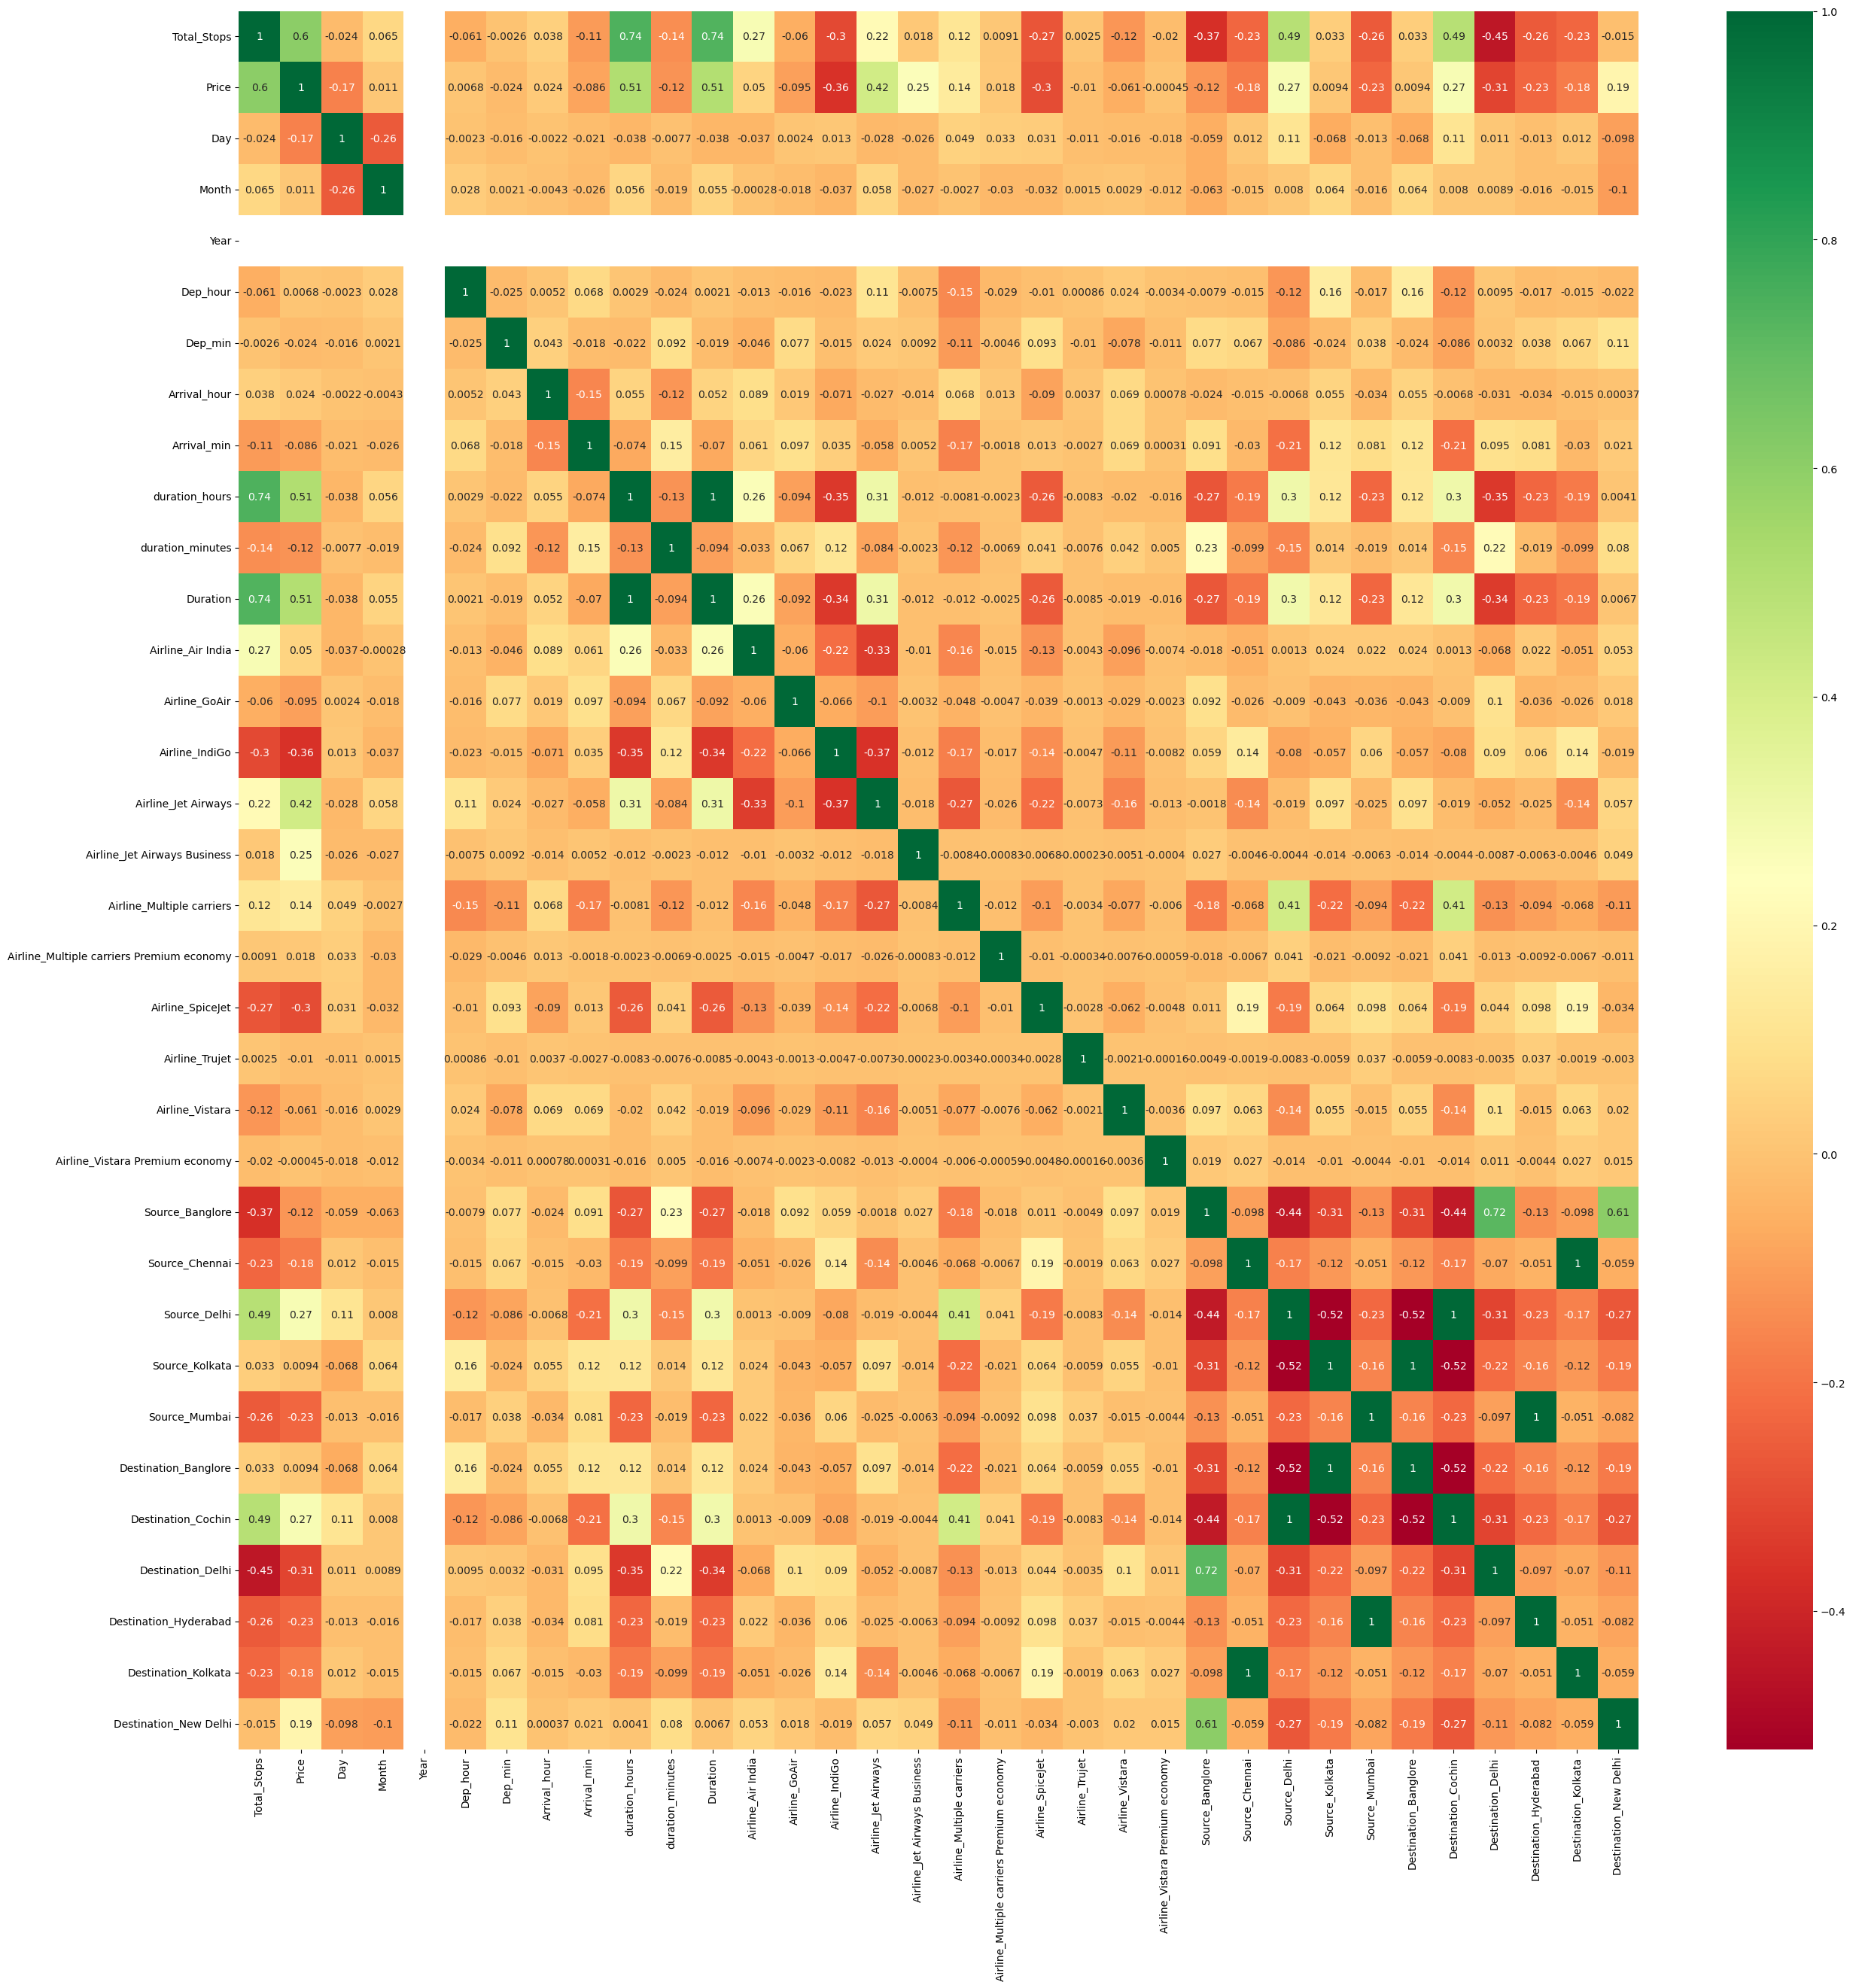

In [260]:
plt.figure(figsize=(30,30))
sns.heatmap(flight.corr(),annot=True,cmap='RdYlGn')
plt.show()

# Feature Engineering

In [262]:
flight.head()

,Total_Stops,Price,Day,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hours,duration_minutes,Duration,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,2019,22,20,1,10,2,50,170,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,2,7662,5,1,2019,5,50,13,15,7,25,445,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,2,13882,6,9,2019,9,25,4,25,19,0,1140,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,1,6218,5,12,2019,18,5,23,30,5,25,325,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,1,13302,3,1,2019,16,50,21,35,4,45,285,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [263]:
X = flight.drop('Price',axis=1)
X.head()

,Total_Stops,Day,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hours,duration_minutes,Duration,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,2019,22,20,1,10,2,50,170,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,2,5,1,2019,5,50,13,15,7,25,445,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,2,6,9,2019,9,25,4,25,19,0,1140,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,1,5,12,2019,18,5,23,30,5,25,325,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,1,3,1,2019,16,50,21,35,4,45,285,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [264]:
y = flight['Price']
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [265]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [266]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [270]:
y_test

6075     16655
3544      4959
9291      9187
5032      3858
2483     12898
         ...  
9797      7408
9871      4622
10063     7452
8802      8824
8617     14151
Name: Price, Length: 2137, dtype: int64

In [271]:
from sklearn.feature_selection import SelectFromModel

In [272]:
selection = SelectFromModel(RandomForestRegressor())
sel = selection.fit(X_train,y_train)

In [276]:
sel.get_support()

array([ True,  True,  True, False, False, False,  True, False,  True,
       False,  True, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [281]:
selected_feat = X_train.columns[sel.get_support()]

In [282]:
selected_feat

Index(['Total_Stops', 'Day', 'Month', 'Arrival_hour', 'duration_hours',
       'Duration', 'Airline_Jet Airways', 'Airline_Jet Airways Business'],
      dtype='object')

In [283]:
len(selected_feat)

8

# Model Fitting

In [284]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [285]:
y_pred = model.predict(X_test)
y_pred

array([16702.24      ,  6151.72      ,  8867.55      , ...,
        6746.65      , 12916.43883333, 13205.43016667])

In [286]:
model.score(X_train,y_train)

0.9516078929649873

In [287]:
model.score(X_test,y_test)

0.8132030927694868

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


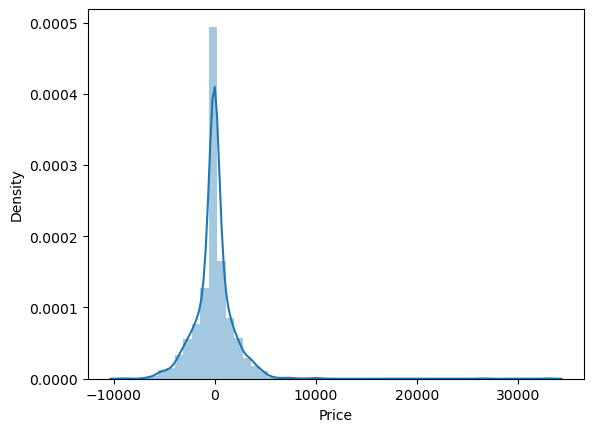

In [288]:
sns.distplot(y_test-y_pred)
plt.show()

In [289]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [297]:
print(f"Mean absolute error: {mean_absolute_error(y_test,y_pred)}")
print(f"Mean squared error: {mean_squared_error(y_test,y_pred)}")
print(f"Root Mean squared error: {np.sqrt(mean_squared_error(y_test,y_pred))}")

Mean absolute error: 1193.1696177215651
Mean squared error: 4027725.43488355
Root Mean squared error: 2006.9193892340445


In [300]:
score = r2_score(y_test,y_pred)
score

0.8132030927694868

In [301]:
from sklearn.model_selection import RandomizedSearchCV

In [308]:
n_estimators = [ int(x) for x in np.linspace(start=100, stop=1200, num= 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(start=5,stop=30,num=6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

In [309]:
random_grid = {
    'n_estimators':n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

In [317]:
random_serach = RandomizedSearchCV(estimator=model,param_distributions=random_grid,cv=5,n_jobs=-1,verbose=3,scoring='neg_mean_squared_error',n_iter=10)

In [318]:
random_serach.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error', verbose=3)

In [319]:
random_serach.best_params_

{'n_estimators': 300,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 15}

In [320]:
prediction = random_serach.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


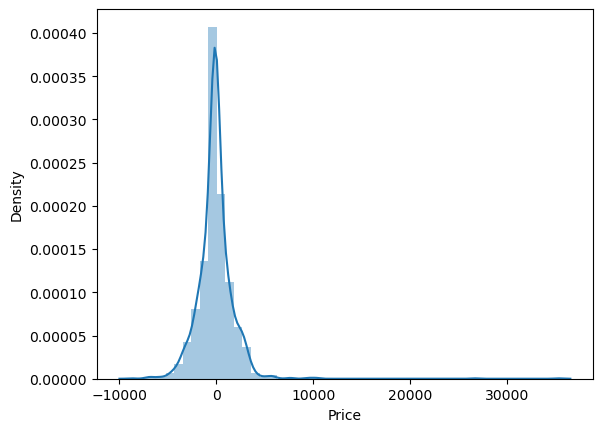

In [321]:
sns.distplot(y_test-prediction)
plt.show()

In [322]:
print(f"Mean absolute error: {mean_absolute_error(y_test,prediction)}")
print(f"Mean squared error: {mean_squared_error(y_test,prediction)}")
print(f"Root Mean squared error: {np.sqrt(mean_squared_error(y_test,prediction))}")

Mean absolute error: 1160.6177750774839
Mean squared error: 3662261.688563114
Root Mean squared error: 1913.7036574566905


In [325]:
score1 = r2_score(y_test,prediction)
score1

0.8301524848323815

In [326]:
import pickle
import os

In [327]:
with open("flight_pred","wb") as f:
    pickle.dump(model,f)

In [329]:
with open("withoutscale","rb") as f:
    obj=pickle.load(f)
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

FileNotFoundError: [Errno 2] No such file or directory: 'withoutscale'